<a href="https://colab.research.google.com/github/HdemonKhaim/Python_Homeworks/blob/main/IgnatenkovDiplomMain_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Игнатенков Дмитрий
Дипломная работа "GDA-DIPLOM-9/Игровой аналитик"

In [1]:
import pandas as pd #импортирую библиотеки
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 11,7
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from scipy.stats import bernoulli, norm, t

Описание датасета

---
Date - Дата проведения сессии

Day - День проведения сессии

Session - Номер сессии

Video# - Номер видеозаписи

Videolink - Ссылка на видеозапись в Youtube      

Videolength - Продолжительность видеозаписи   

Timestamp - Время выполняемого действия  

Timelink - Ссылка на момент в видеозаписи   

Player Level - Уровень игрока  

Stronghold Level - Уровень крепости игрока  

Tag - Тэг объекта, к которому привязано действие (Player,Battle,Craft,VIP и т.д.)

Action - Выполняемое действие          

Info - Комментарий к выполняемому действию       

Shortage - Информация о нехватке ресурсов (Heroes,Food и т.д.)
    
Ended -  Информация о том, что закончился какой-то ресурс       
      
Limits - Информация о достижении лимита ресурсов  

New expirience - Информация об ознакомлении пользователя с новой механикой

Offer Time - Время доступности спецпредложения в магазине 

Team Power - Боевая мощь отряда героев

Name - Название героя, предмета, здания и т.д.    

Level - Уровень героя, здания.   

Rarity - Редкость героя     

Stage - Этап компании     

Provimce - Уровень провинции 
    
Result - Результат поединка   

Gems - Информация о самоцветах         

Gems+ - Сколько игрок получил самоцветов    

Gems- - Сколько игрок потратил самоцветов      

Gems Balance - Текущий баланс самоцветов


Не платящий игрок

In [2]:
df_NP = pd.read_excel('/content/Empires___Puzzles_Non-Paying.xlsx')
print(df_NP.shape) #количество стр. и столб.
df_NP.info()

(8457, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8457 entries, 0 to 8456
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              8457 non-null   datetime64[ns]
 1   Day               8457 non-null   int64         
 2   Session           8457 non-null   int64         
 3   Video #           8457 non-null   float64       
 4   Videolink         8457 non-null   object        
 5   Videolength       8457 non-null   object        
 6   Timestamp         8457 non-null   object        
 7   Timelink          8457 non-null   object        
 8   Player Level      8454 non-null   float64       
 9   Stronghold Level  8457 non-null   int64         
 10  Tag               8457 non-null   object        
 11  Action            8457 non-null   object        
 12  Info              2464 non-null   object        
 13  Shortage1         311 non-null    object        
 14  Shortage2    

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


Всего в DF 8457 строк и 33 столбца.
Выявлены следующие ошибки.

---


1.   Player Level - тип данных стоит float.В игре уровень игрока может быть только целочисленным.Также есть пропуски в данных (3).
2.   New expirience - неверное название столбца.Верное - New experience
3.   Level - тип данных указан как объект.Должен быть int.



In [3]:
df_NP.head(5)

,Date,Day,Session,Video #,Videolink,Videolength,Timestamp,Timelink,Player Level,Stronghold Level,...,Level,Rarity,Stage2,Provimce,Stage,Result,Gems,Gems+,Gems-,Gems Balance
0,2020-10-14,1,1,1.1,https://youtu.be/fee6_4ikGMw?list=PLTjhk5BwsiV...,01:02:17,00:00:00,00:00:00,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1,2020-10-14,1,1,1.1,https://youtu.be/fee6_4ikGMw?list=PLTjhk5BwsiV...,01:02:17,00:00:21,00:00:21,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
2,2020-10-14,1,1,1.1,https://youtu.be/fee6_4ikGMw?list=PLTjhk5BwsiV...,01:02:17,00:00:21,00:00:21,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
3,2020-10-14,1,1,1.1,https://youtu.be/fee6_4ikGMw?list=PLTjhk5BwsiV...,01:02:17,00:00:35,00:00:35,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
4,2020-10-14,1,1,1.1,https://youtu.be/fee6_4ikGMw?list=PLTjhk5BwsiV...,01:02:17,00:00:37,00:00:37,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0


In [4]:
df_NP['Shortage1'].unique()

array([nan, 'Food', 'blank', 'Iron', 'Energy', 'Rare heroes', 'Heroes',
       'Materials', 'Recruits'], dtype=object)

In [5]:
df_NP['Shortage2'].unique()

array([nan, 'blank', 'Materials', 'Heroes', 'Food', 'Materials craft'],
      dtype=object)

In [6]:
df_NP['Shortage3'].unique()

array([nan, 'Hero Level'], dtype=object)

In [7]:
df_NP['Limits'].unique()

array([nan, 'Player Level', 'Recruits', 'Iron', 'Construction queue',
       'blank', 'Hero Level', 'Building Level', 'Provinces'], dtype=object)

В столбцах Shortage1,Shortage2 и Limits выявлены строки blank - пропуски.В справках к DF не нашел конкретного пояснения им.В видеозаписях тоже.Поэтому заменю эти строки на Nan.

In [8]:
df_NP.loc[(df_NP.Shortage1 == 'blank'), 'Shortage1'] = np.nan
df_NP['Shortage1'].unique()

array([nan, 'Food', 'Iron', 'Energy', 'Rare heroes', 'Heroes',
       'Materials', 'Recruits'], dtype=object)

In [9]:
df_NP.loc[(df_NP.Shortage2 == 'blank'), 'Shortage2'] = np.nan
df_NP['Shortage2'].unique()

array([nan, 'Materials', 'Heroes', 'Food', 'Materials craft'],
      dtype=object)

In [10]:
df_NP.loc[(df_NP.Limits == 'blank'), 'Limits'] = np.nan
df_NP['Limits'].unique()

array([nan, 'Player Level', 'Recruits', 'Iron', 'Construction queue',
       'Hero Level', 'Building Level', 'Provinces'], dtype=object)

In [11]:
df_NP.rename(columns = {'New expirience' : 'New Experience'}, inplace = True) #Меняю название столбца с ошибкой.

In [12]:
df_NP['New Experience'].unique()

array([nan, 1, '1(просмотр призыва с войсками из ивента)',
       '1 (дали в награду войско с 2 звездами)',
       '1 (первое нападение на игрока оффлайн, но это не точно)',
       '1 (выпали герои и войска с 2 звездами)',
       '1 (первый раз так много героев и войск дали)', 'Первый квест',
       '1(первый раз дали тренера)'], dtype=object)

In [13]:
df_NP['Player Level'].unique() #Выявляю пропуски.При просмотре df обнаружил пропуски строго 7 уровня, поэтому меняю все Nan на 7

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7., nan,  8.,  9., 10., 11., 12.,
       13., 14.])

In [14]:
df_NP['Player Level'] = df_NP['Player Level'].fillna(7)

In [15]:
df_NP = df_NP.astype({'Player Level': 'Int64'}) #Меняю тип данных
df_NP['Player Level'].unique()

<IntegerArray>
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
Length: 14, dtype: Int64

In [16]:
df_NP['Level'].unique() #В столбце есть строки Max и 1481.При анализ установил, что max относится к героям тренерам с 1 звездой, их максимальный ур. = 20.
 #1481 не удалось установить к чему относится данное значение - возможно ошибка, меняю на Nan 

array([nan, 0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 17, 'Max', 19, 20, 25, 30, 16,
       12, 7, 15, 14, 22, 29, 33, 37, 40, 10, 24, 1481], dtype=object)

In [17]:
df_NP.loc[(df_NP.Level == 'Max') & (df_NP.Rarity == 1), 'Level'] = 20
df_NP.loc[(df_NP.Level == 1481), 'Level'] = np.nan

In [18]:
df_NP = df_NP.astype({'Level': 'Int64'})

In [19]:
df_NP.head(5)

,Date,Day,Session,Video #,Videolink,Videolength,Timestamp,Timelink,Player Level,Stronghold Level,...,Level,Rarity,Stage2,Provimce,Stage,Result,Gems,Gems+,Gems-,Gems Balance
0,2020-10-14,1,1,1.1,https://youtu.be/fee6_4ikGMw?list=PLTjhk5BwsiV...,01:02:17,00:00:00,00:00:00,1,1,...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1,2020-10-14,1,1,1.1,https://youtu.be/fee6_4ikGMw?list=PLTjhk5BwsiV...,01:02:17,00:00:21,00:00:21,1,1,...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
2,2020-10-14,1,1,1.1,https://youtu.be/fee6_4ikGMw?list=PLTjhk5BwsiV...,01:02:17,00:00:21,00:00:21,1,1,...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
3,2020-10-14,1,1,1.1,https://youtu.be/fee6_4ikGMw?list=PLTjhk5BwsiV...,01:02:17,00:00:35,00:00:35,1,1,...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
4,2020-10-14,1,1,1.1,https://youtu.be/fee6_4ikGMw?list=PLTjhk5BwsiV...,01:02:17,00:00:37,00:00:37,1,1,...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0


In [20]:
gems = df_NP['Gems+'].sum()
gems2 = df_NP['Gems-'].sum()
print(df_NP.shape) 
df_NP.info()
df_NP.describe().round().T

(8457, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8457 entries, 0 to 8456
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              8457 non-null   datetime64[ns]
 1   Day               8457 non-null   int64         
 2   Session           8457 non-null   int64         
 3   Video #           8457 non-null   float64       
 4   Videolink         8457 non-null   object        
 5   Videolength       8457 non-null   object        
 6   Timestamp         8457 non-null   object        
 7   Timelink          8457 non-null   object        
 8   Player Level      8457 non-null   Int64         
 9   Stronghold Level  8457 non-null   int64         
 10  Tag               8457 non-null   object        
 11  Action            8457 non-null   object        
 12  Info              2464 non-null   object        
 13  Shortage1         245 non-null    object        
 14  Shortage2    

,count,mean,std,min,25%,50%,75%,max
Day,8457.0,7.0,4.0,1.0,3.0,7.0,11.0,14.0
Session,8457.0,20.0,13.0,1.0,8.0,20.0,32.0,41.0
Video #,8457.0,20.0,13.0,1.0,8.0,20.0,32.0,41.0
Player Level,8457.0,9.0,3.0,1.0,7.0,10.0,12.0,14.0
Stronghold Level,8457.0,5.0,2.0,1.0,4.0,5.0,6.0,8.0
Team Power,597.0,1213.0,194.0,0.0,1110.0,1222.0,1334.0,1523.0
Level,660.0,3.0,5.0,0.0,1.0,1.0,3.0,40.0
Rarity,353.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0
Provimce,451.0,6.0,3.0,1.0,4.0,5.0,9.0,12.0
Stage,450.0,4.0,2.0,1.0,2.0,4.0,6.0,10.0


In [21]:
print(gems, gems2)

589 -510


После исправления ошибок выявил следующие данные.

---
Игрок в течении 14-ти дней провел 41 сессию.Он достиг 14 уровня профиля и 8 уровня крепости.Максимальную силу отряда он набрал - 1523 пункта.Героев выше 3х звезд редкости он не получил, их максимальный уровень - 40.Достиг 10 стадии компании.Игрок накопил 569 самоцветов и потратил 510.


Платящий игрок

In [22]:
df_W = pd.read_excel('/content/Empires___Puzzles_Whale.xlsx')
print(df_W.shape) 
df_W.info()

(10380, 30)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10380 entries, 0 to 10379
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              10380 non-null  datetime64[ns]
 1   Day               10380 non-null  int64         
 2   Session           10380 non-null  int64         
 3   Video #           10380 non-null  float64       
 4   Videolink         10380 non-null  object        
 5   Videolength       10380 non-null  object        
 6   Timestamp         10380 non-null  object        
 7   Timelink          10380 non-null  object        
 8   Player Level      10380 non-null  int64         
 9   Stronghold Level  10380 non-null  int64         
 10  Tag               10378 non-null  object        
 11  Action            10378 non-null  object        
 12  Info              2405 non-null   object        
 13  Shortage1         301 non-null    object        
 14  Shortage2 

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


Всего в DF 10380 строк и 30 столбца.
Выявлены следующие ошибки.

---


1.   Отсутсвуют столбцы Province, Shortage3 и Stage2.
2.   New expirience - Тип указан как float.Для соотношения с df_NP должен быть object
3.   Level - тип данных указан как объект.Должен быть int.
4.   Stage - тип данных указан как объект, так как помимо этапа указан через тирэ подэтап компании, из-за чего указать столбец как int затруднительно.

In [23]:
df_W['Level'].unique() #Также как и в df_NP есть строки Max. При анализе установил что они относятся также к героям тренерам 3 и 4 звезд.
#У героев-тренеров 3х звезд макимальный уровень 50, а у 4х звезд 70

array([nan, 0, 1, 2, 3, 4, 9, 11, 8, 5, 7, 10, 13, 12, 15, 16, 14, 21, 19,
       18, 6, 27, 20, 30, 24, 33, 26, 34, 28, 36, 29, 45, 40, 35, 48, 17,
       50, 37, 32, 42, 23, 41, 22, 46, 52, 57, 49, 44, 60, 'Max', 43, 25,
       38], dtype=object)

In [24]:
df_W.loc[(df_W.Level == 'Max') & (df_W.Rarity == 3), 'Level'] = 50

In [25]:
df_W.loc[(df_W.Level == 'Max') & (df_W.Rarity == 4), 'Level'] = 70

In [26]:
df_W = df_W.astype({'Level': 'Int64'})

In [27]:
df_W['Level'].unique()

<IntegerArray>
[<NA>,    0,    1,    2,    3,    4,    9,   11,    8,    5,    7,   10,   13,
   12,   15,   16,   14,   21,   19,   18,    6,   27,   20,   30,   24,   33,
   26,   34,   28,   36,   29,   45,   40,   35,   48,   17,   50,   37,   32,
   42,   23,   41,   22,   46,   52,   57,   49,   44,   60,   70,   43,   25,
   38]
Length: 53, dtype: Int64

In [28]:
df_W = df_W.astype({'New Experience': 'object'})

In [29]:
df_W['Stage'].unique() #Исходя из данных удается узнать, что игрок достиг 17 этапа компании

array([nan, '1-1', '1-2', '1-3', '1-4', '1-5', '2-1', '2-2', '2-3', '2-4',
       '2-5', '2-6', '3-1', '3-2', '3-3', '3-4', '3-5', '3-6', '3-7',
       '4-1', '4-2', '4-3', '4-4', '4-5', '4-6', '4-7', '5-1', '5-2',
       '5-3', '5-4', '5-5', '5-6', '5-7', '5-8', '5-9', '6-1', '6-2',
       '6-3', '6-4', '6-5', '6-6', '6-7', '6-8', '6-9', '7-1', '7-2',
       '7-3', '7-4', '7-5', '7-6', '7-7', '7-8', '8-1', '8-2', '8-3',
       '8-4', '8-5', '8-6', '8-7', '8-8', '9-1', '9-2', '9-3', '9-4',
       '9-5', '9-6', '9-7', '9-8', '9-9', '9-10', '10-1', '10-2', '10-3',
       '10-4', '10-5', '10-6', '10-7', '10-8', '10-9', '10-10', '11-1',
       '11-2', '11-3', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '11-4',
       '11-5', '11-6', '11-7', '11-8', '11-9', '11-10', '12-1', '12-2',
       '12-3', '12-4', '12-5', '12-6', '12-7', '12-8', '12-9', '12-10',
       '13-1', '13-2', '13-3', '13-4', '13-5', '13-6', '13-7', '13

In [30]:
print(df_W.shape) 
df_W.info()
df_W.describe().round().T

(10380, 30)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10380 entries, 0 to 10379
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              10380 non-null  datetime64[ns]
 1   Day               10380 non-null  int64         
 2   Session           10380 non-null  int64         
 3   Video #           10380 non-null  float64       
 4   Videolink         10380 non-null  object        
 5   Videolength       10380 non-null  object        
 6   Timestamp         10380 non-null  object        
 7   Timelink          10380 non-null  object        
 8   Player Level      10380 non-null  int64         
 9   Stronghold Level  10380 non-null  int64         
 10  Tag               10378 non-null  object        
 11  Action            10378 non-null  object        
 12  Info              2405 non-null   object        
 13  Shortage1         301 non-null    object        
 14  Shortage2 

,count,mean,std,min,25%,50%,75%,max
Day,10380.0,7.0,4.0,1.0,3.0,7.0,10.0,14.0
Session,10380.0,18.0,10.0,1.0,9.0,19.0,26.0,35.0
Video #,10380.0,18.0,10.0,1.0,9.0,19.0,26.0,35.0
Player Level,10380.0,13.0,5.0,1.0,10.0,14.0,17.0,19.0
Stronghold Level,10380.0,8.0,3.0,1.0,6.0,9.0,11.0,11.0
Team Power,761.0,2088.0,437.0,0.0,1817.0,2106.0,2408.0,2868.0
Level,1636.0,6.0,11.0,0.0,1.0,1.0,4.0,70.0
Rarity,1102.0,2.0,1.0,1.0,1.0,1.0,2.0,5.0
Gems,356.0,1.0,1406.0,-8400.0,-89.0,-4.0,3.0,10000.0
Gems+,10380.0,7.0,218.0,0.0,0.0,0.0,0.0,10000.0


In [31]:
gems1 = df_W['Gems+'].sum()
gems3 = df_W['Gems-'].sum()
print(gems1,gems3)

71669 -71461


После исправления ошибок выявил следующие данные.

---
За 14 дней игрок провел 35 сессий. Уровень профиля достиг 19, уровень крепости - 11.Игрок достиг 17 этапа компании.Сила отряда достигнута до 2868 пунков.Игрок получил несколько героев 5 звезд.Заполучил 71669 самоцветов, потратил 71461.

Теперь сформируем 4 метрики, отличающих платящего пользователя от неплатящего.

---


1.   Result - победы и поражения
2.   Rarity - наличие героев разной редкости
3.   Player Level - уровень игрока
4.   Team Power - сила отряда.



Построим Pie-plot чтобы сравнить соотношение побед и поражений у платящего и не платящего пользователя.

Victory        356
Defeat         246
Out of Time      8
Name: Result, dtype: int64
610


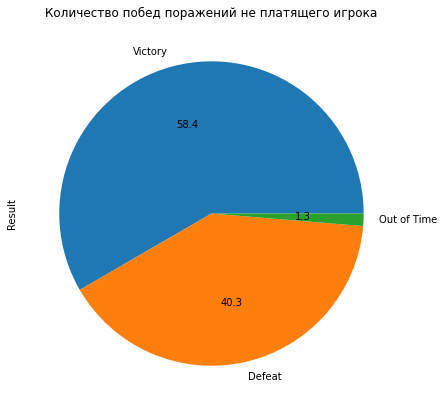

In [32]:
WD_NP = df_NP['Result'].value_counts()
WD_NP.plot(kind='pie', autopct='%.1f',
           title='Количество побед поражений не платящего игрока')
print(WD_NP)
print(df_NP['Result'].count())

Victory        473
Defeat         148
Out of Time     60
Name: Result, dtype: int64
681


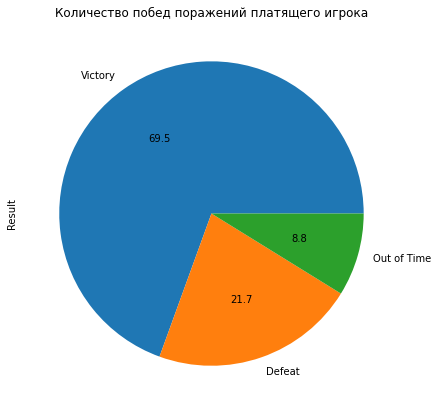

In [33]:
WD_W = df_W['Result'].value_counts()
WD_W.plot(kind='pie', autopct='%.1f',
          title='Количество побед поражений платящего игрока')
print(WD_W)
print(df_W['Result'].count())

In [34]:
DF_OOT_NP = df_NP.loc[df_NP['Result'] == 'Out of Time'] 
DF_OOT_NP

,Date,Day,Session,Video #,Videolink,Videolength,Timestamp,Timelink,Player Level,Stronghold Level,...,Level,Rarity,Stage2,Provimce,Stage,Result,Gems,Gems+,Gems-,Gems Balance
4263,2020-10-20,7,20,20.0,https://youtu.be/7mCLB4xUVHg?list=PLTjhk5BwsiV...,01:20:37,00:56:25,00:56:25,10,5,...,<NA>,NaN,NaN,NaN,NaN,Out of Time,NaN,0,0,197
5414,2020-10-23,10,27,27.0,https://youtu.be/2I8lekbgF3E?list=PLTjhk5BwsiV...,00:42:04,00:22:11,00:22:11,11,6,...,<NA>,NaN,NaN,NaN,NaN,Out of Time,NaN,0,0,257
5930,2020-10-24,11,30,30.0,https://youtu.be/1quZnrdPdHI?list=PLTjhk5BwsiV...,00:59:31,00:13:34,00:13:34,12,6,...,<NA>,NaN,NaN,NaN,NaN,Out of Time,NaN,0,0,269
6263,2020-10-24,11,32,32.0,https://youtu.be/rEL0_2L1kvE?list=PLTjhk5BwsiV...,00:27:33,00:06:11,00:06:11,12,6,...,<NA>,NaN,NaN,NaN,NaN,Out of Time,NaN,0,0,334
6911,2020-10-25,12,35,35.0,https://youtu.be/U0RCXPaB8nY?list=PLTjhk5BwsiV...,00:50:52,00:09:41,00:09:41,12,7,...,<NA>,NaN,NaN,NaN,NaN,Out of Time,NaN,0,0,5
7014,2020-10-25,12,35,35.0,https://youtu.be/U0RCXPaB8nY?list=PLTjhk5BwsiV...,00:50:52,00:43:02,00:43:02,13,7,...,<NA>,NaN,NaN,NaN,NaN,Out of Time,NaN,0,0,17
7017,2020-10-25,12,35,35.0,https://youtu.be/U0RCXPaB8nY?list=PLTjhk5BwsiV...,00:50:52,00:44:46,00:44:46,13,7,...,<NA>,NaN,NaN,NaN,NaN,Out of Time,NaN,0,0,17
7150,2020-10-26,13,36,36.0,https://youtu.be/-sRo4U3dKCw?list=PLTjhk5BwsiV...,01:17:26,00:16:46,00:16:46,13,7,...,<NA>,NaN,NaN,NaN,NaN,Out of Time,NaN,0,0,28


In [35]:
DF_OOT_W = df_W.loc[df_W['Result'] == 'Out of Time'] 
DF_OOT_W

,Date,Day,Session,Video #,Videolink,Videolength,Timestamp,Timelink,Player Level,Stronghold Level,...,Team Power,Name,Level,Rarity,Stage,Result,Gems,Gems+,Gems-,Gems Balance
1090,2020-10-27,1,3,3.0,https://youtu.be/6Gl4V9lhvBs?list=PLTjhk5BwsiV...,00:59:54,00:34:43,00:34:43,6,4,...,NaN,NaN,<NA>,NaN,NaN,Out of Time,NaN,0,0,864
1522,2020-10-28,2,5,5.0,https://youtu.be/aoL9ccpafUc?list=PLTjhk5BwsiV...,00:20:44,00:05:13,00:05:13,7,5,...,NaN,NaN,<NA>,NaN,NaN,Out of Time,NaN,0,0,695
2093,2020-10-28,2,7,7.1,https://youtu.be/J6LNYulbQpI?list=PLTjhk5BwsiV...,01:03:52,00:43:00,00:43:00,9,5,...,NaN,NaN,<NA>,NaN,NaN,Out of Time,NaN,0,0,6591
2602,2020-10-29,3,9,9.1,https://youtu.be/4Gu7MKAj_fA?list=PLTjhk5BwsiV...,00:59:39,00:55:08,00:55:08,10,6,...,NaN,NaN,<NA>,NaN,NaN,Out of Time,NaN,0,0,2846
2605,2020-10-29,3,9,9.1,https://youtu.be/4Gu7MKAj_fA?list=PLTjhk5BwsiV...,00:59:39,00:56:54,00:56:54,10,6,...,NaN,NaN,<NA>,NaN,NaN,Out of Time,NaN,0,0,2846
2610,2020-10-29,3,9,9.1,https://youtu.be/4Gu7MKAj_fA?list=PLTjhk5BwsiV...,00:59:39,00:58:50,00:58:50,10,6,...,NaN,NaN,<NA>,NaN,NaN,Out of Time,NaN,0,0,2846
3099,2020-10-30,4,11,11.0,https://youtu.be/lFXrK_xiFWo?list=PLTjhk5BwsiV...,00:44:44,00:26:51,00:26:51,11,7,...,NaN,NaN,<NA>,NaN,NaN,Out of Time,NaN,0,0,2838
3160,2020-10-30,4,11,11.0,https://youtu.be/lFXrK_xiFWo?list=PLTjhk5BwsiV...,00:44:44,00:34:58,00:34:58,11,7,...,NaN,NaN,<NA>,NaN,NaN,Out of Time,NaN,0,0,2742
3321,2020-10-30,4,12,12.0,https://youtu.be/9yHuO6F82Rg?list=PLTjhk5BwsiV...,00:51:15,00:21:16,00:21:16,12,7,...,NaN,NaN,<NA>,NaN,NaN,Out of Time,NaN,0,0,1582
3327,2020-10-30,4,12,12.0,https://youtu.be/9yHuO6F82Rg?list=PLTjhk5BwsiV...,00:51:15,00:24:53,00:24:53,12,7,...,NaN,NaN,<NA>,NaN,NaN,Out of Time,NaN,0,0,1582


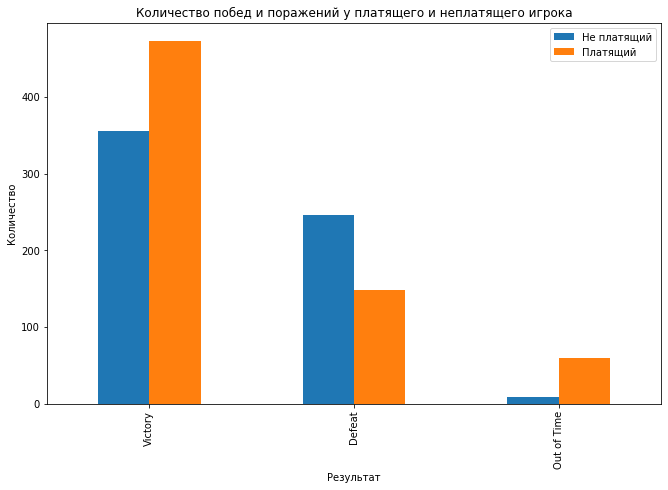

In [94]:
index = np.arange(3)
data = {'Не платящий': [356,246,8],
        'Платящий': [473,148,60]}
df1 = pd.DataFrame(data)
df1.plot(kind='bar',title='Количество побед и поражений у платящего и неплатящего игрока',
           xlabel='Результат',
           ylabel='Количество')
plt.xticks(index,['Victory','Defeat','Out of Time'])
plt.show()

За 14 дней игроки сыграли приблизительно одинаковое количество боев, но с перевесом в сторону платящего пользователя.

У неплатящего игрока их 610, у платящего их 681.

При этом заметно, что платящий игрок чаще одерживает победу, у него 69.5%, в то время как у неплатящего 58.4%.

Пункт Out of Time связан с активностью "Альянс - Битва с титаном".В этой активности практически нельзя одержать победу.Можно либо потерять вель отряд в бою, либо продержаться до истичения времени.Платящему игроку чаще удавалось продержаться до конца битвы, чем неплатящему - 60(8.8%) против 8(1.3%)

Теперь посмотрим на соотношение сил команды героев у пользователей с агрегацией по дням.

In [36]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_NP['Day'], y=df_NP['Team Power'],mode='markers', name='Не платящий игрок'))
fig.add_trace(go.Scatter(x=df_W['Day'], y=df_W['Team Power'],mode='markers', name='Платящий игрок'))
fig.update_layout(legend_orientation="h")
fig.show()

Из графика видим, что платящий игрок практически в два раза превосходит по силе не платящего пользователя к 14-ому дню.2868 против 1523.

Рост силы у игроков идет практически равномерно, однако у платящего игрока заметны пункты резкого падения силы отряда, так и резкого подъема.Падения связаны с набором героев в войны альянса или обороной базы, где нужно выставлять в битву несколько команд, в члены которого игрок ставит более слабых героев.Эти падения видны в с 5ого по 9ый день и с 12ого-14ый день.У не платящего игрока эти падения также заметны с 12ого по 14ый день.По эим же причинам в эти дни наблюдаются падения силы отряда до 0, это говорит о нехватке героев.

У платящего игрока наблюдается сильный рост силы на 13ый день.Это связано с покупкой бустеров с героями и тренерами.



Теперь сравним рост уровня пользователей с агрегацией по дням.

In [37]:
fig_4 = go.Figure()
fig_4.add_trace(go.Scatter(x=df_NP['Day'], y=df_NP['Player Level'],mode='lines+markers', name='Неплатящий игрок'))
fig_4.add_trace(go.Scatter(x=df_W['Day'], y=df_W['Player Level'],mode='lines+markers', name='Платящий игрок'))
fig_4.update_layout(legend_orientation="h")
fig_4.show()

Платящий игрок заметно превосходит не платящего игрока по уровню к 14ому дню игры.19 против 14.

На второй и третий день платящий игрок значительно оторвался от не платящего на несколько уровней,после чего их прогрессия идет паралельно друг к другу за исключением 5ого дня.

Соотнесем количество и редкость героев у платящего и неплатящего пользователя

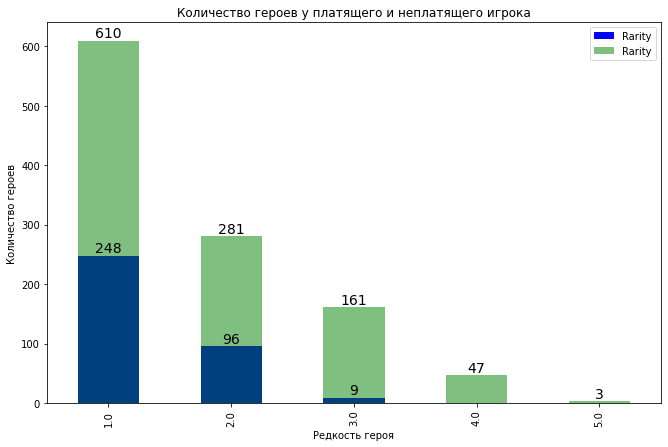

In [38]:

DFNPgraf = df_NP.groupby(df_NP.Rarity)['Rarity'].count().head(5)
DFNPgraf.plot(kind="bar",
           color = 'b',)
for a, b in enumerate(DFNPgraf.values):
    plt.text(a, b, int(b), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':14})
DFWgraf = df_W.groupby(df_W.Rarity)['Rarity'].count()
DFWgraf.plot(kind="bar", 
           alpha = 0.5,  
           color = 'g', 
           title='Количество героев у платящего и неплатящего игрока',
           xlabel='Редкость героя',
           ylabel='Количество героев')
for i, val in enumerate(DFWgraf.values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':14})      
plt.legend(loc='upper right') 

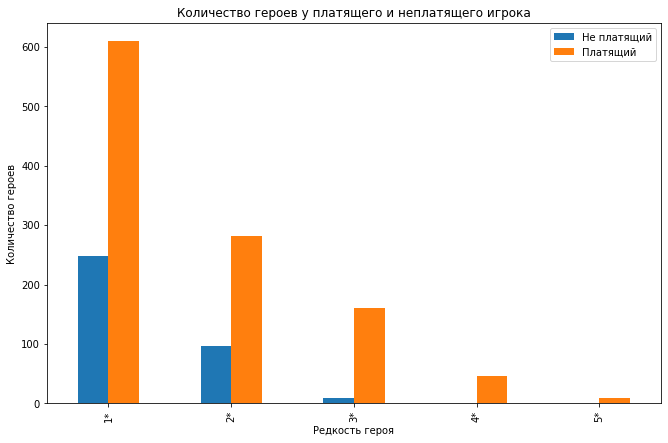

In [92]:
index = np.arange(5)
data = {'Не платящий': [248,96,9,0,0],
        'Платящий': [610,281,161,47,9]}
df = pd.DataFrame(data)
df.plot(kind='bar',title='Количество героев у платящего и неплатящего игрока',
           xlabel='Редкость героя',
           ylabel='Количество героев')
plt.xticks(index,['1*','2*','3*','4*','5*'])
plt.show()

In [39]:
print('Всего получено героев за все время у не платящего игрока: ',df_NP['Rarity'].count())  
print('Всего получено героев за все время у платящего игрока: ',df_W['Rarity'].count())  

Всего получено героев за все время у не платящего игрока:  353
Всего получено героев за все время у платящего игрока:  1102


За 14 дней платящий пользователь приобрел в 3 раза больше героев, чем не платящий игрок. 1102 против 353.

При этом не платящий пользователь так и не получил героев выше 3 звезд редкости.

Проверка гипотезы о среднем количестве побед у игрока в день.

H0 = Игрок ежедневно на протяжении 14ти дней одерживает в среднем 25 побед.

Н1 = Игрок ежедневно на протяжении 14ти дней одерживает больше 25 побед.

α = 5%

In [40]:
a = df_NP[df_NP['Result'].isin(['Victory'])]
b = df_W[df_W['Result'].isin(['Victory'])]

In [41]:
a1 = a.groupby(a.Day)['Day'].count()
b1 = b.groupby(b.Day)['Day'].count()

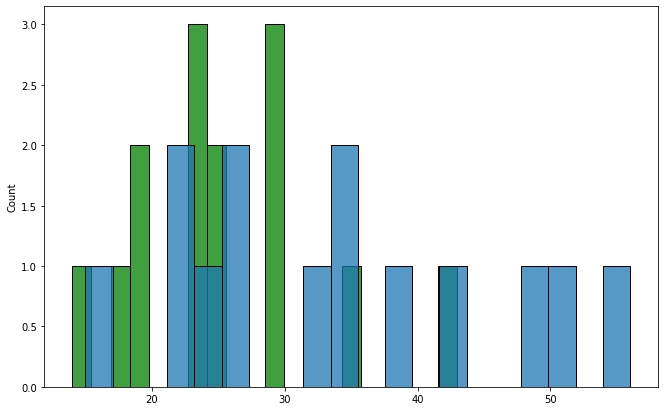

In [42]:
x1 = a1
x2 = b1
x1 = np.asarray(x1)
x2 = np.asarray(x2)
sns.histplot(x1,color = 'g', bins=20)
sns.histplot(x2, bins=20)

In [43]:
print('Среднее значение и стандартное отклонение не платящего игрока:')
print(x1.mean())
print(x1.std())
print('Среднее значение и стандартное отклонение платящего игрока:')
print(x2.mean())
print(x2.std())

Среднее значение и стандартное отклонение не платящего игрока:
25.428571428571427
7.158554180781456
Среднее значение и стандартное отклонение платящего игрока:
33.785714285714285
11.6138991325577


In [44]:
μ = 25
n = 14

t_star1 = (x1.mean()-μ)/(x1.std()/np.sqrt(n))
t_star2 = (x2.mean()-μ)/(x2.std()/np.sqrt(n))
print(t_star1)
print(t_star2)

0.22400716834408158
2.8304992474985124


In [45]:
print('p не платящего пользователя = ',1-t.cdf(t_star1, df=n-1))
print('p платящего пользователя = ',1-t.cdf(t_star2, df=n-1))

p не платящего пользователя =  0.41311688122434953
p платящего пользователя =  0.007088511260689767


Значение P у не платящего пользователя больше уровня значимости 5%.Это означает, что мы можем принять нулевую гипотезу. 

Значение P у платящего пользователя меньше уровня значимости 5%.Это означает, что мы можем отклонить нулевую гипотезу.

Вывод.

---
Платящий игрок получает значительное преимущество перед не платящим игроком. Это выражается в количестве побед, количестве доступных героев. Большое количество лишних героев помогает платящему игроку быстрее развивать своих основных героев, а доступ к платным ресурсов ускоряет прогрессию его базы, что выражено в уровне крепости. Боевая мощь отряда героев платящего игрока в 2 раза превосходит героев не платящего.
